In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data from CSV file
df2 = pd.read_csv('Toddler Autism dataset July 2018.csv',sep=",")

In [3]:
#print the toddler dataset
print(df2)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

In [4]:
# Show the first five rows of the dataset
df2.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# Check for missing values in the dataset
#df.isna() returns a DataFrame with the same shape as df containing boolean values indicating whether each element of df is a missing value or not. Then, sum() is called on this DataFrame which counts the number of True values (missing values) for each column, and returns a new Series containing those counts.
#So, the output of df.isna().sum() gives you the count of missing values for each column of the DataFrame df.
df2.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [6]:
import seaborn as sns #to create more visually appealing and informative plots 
sns.set_style('whitegrid')   #'whitegrid' style is used, which adds horizontal and vertical gridlines
data2= df2[df2['Class/ASD Traits ']=='Yes'] # Filter data to include only ASD positive cases
print("Toddlers:",len(data2)/len(df2) * 100) # Print the percentage of toddlers with ASD traits

Toddlers: 69.07020872865274


Text(0.5, 1.0, 'Toddlers dataset')

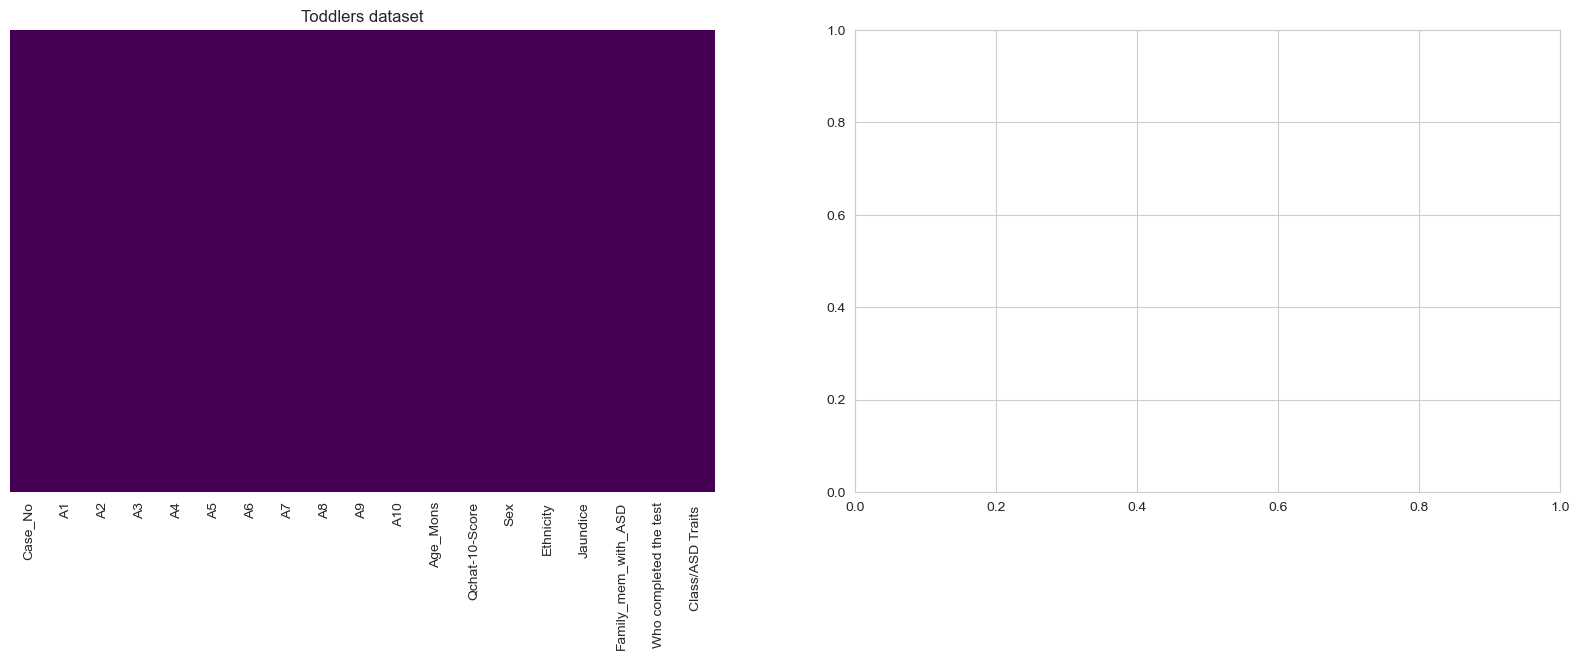

In [7]:
#Let's visualize the missing data
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
ax[0].set_title('Toddlers dataset')

Text(0.5, 0, 'Jaundice while birth')

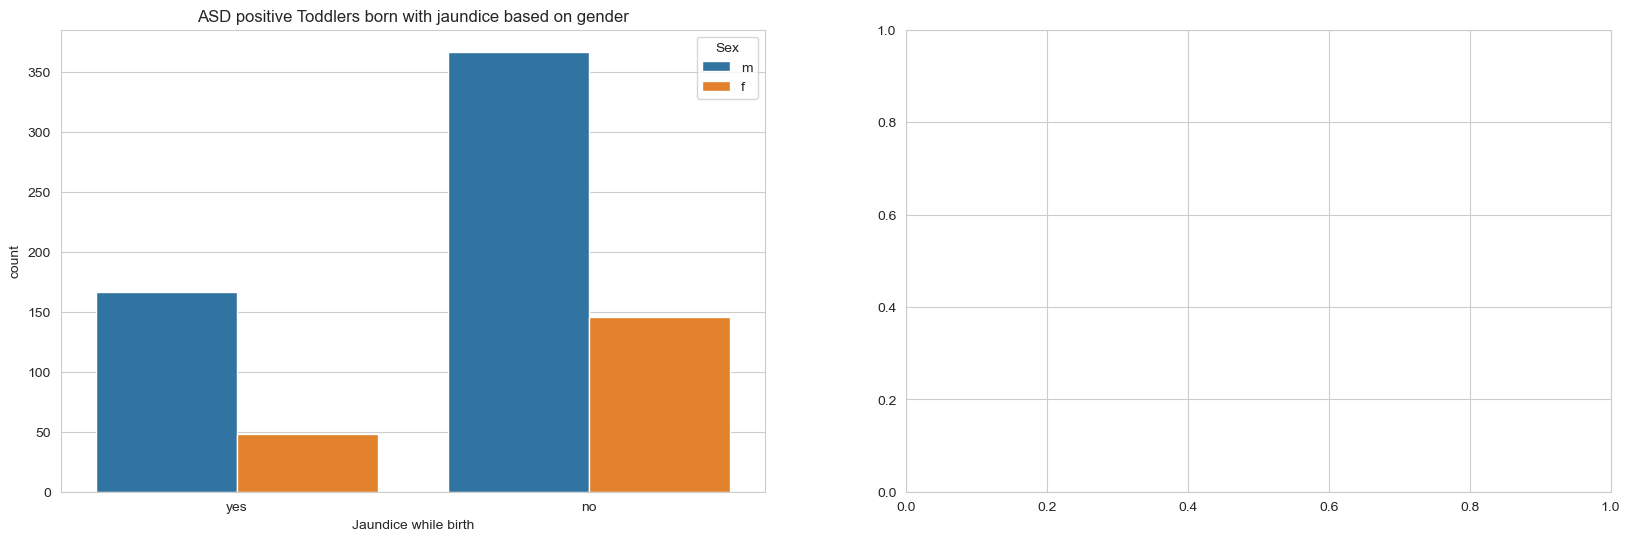

In [8]:
#Let's visualize the jaundice born child based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6)) # creates a figure with one row and two columns of subplots and sets the size of the figure to (20,6).
sns.countplot(x='Jaundice',data=data2,hue='Sex',ax=ax[0])
ax[0].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of ASD positive')

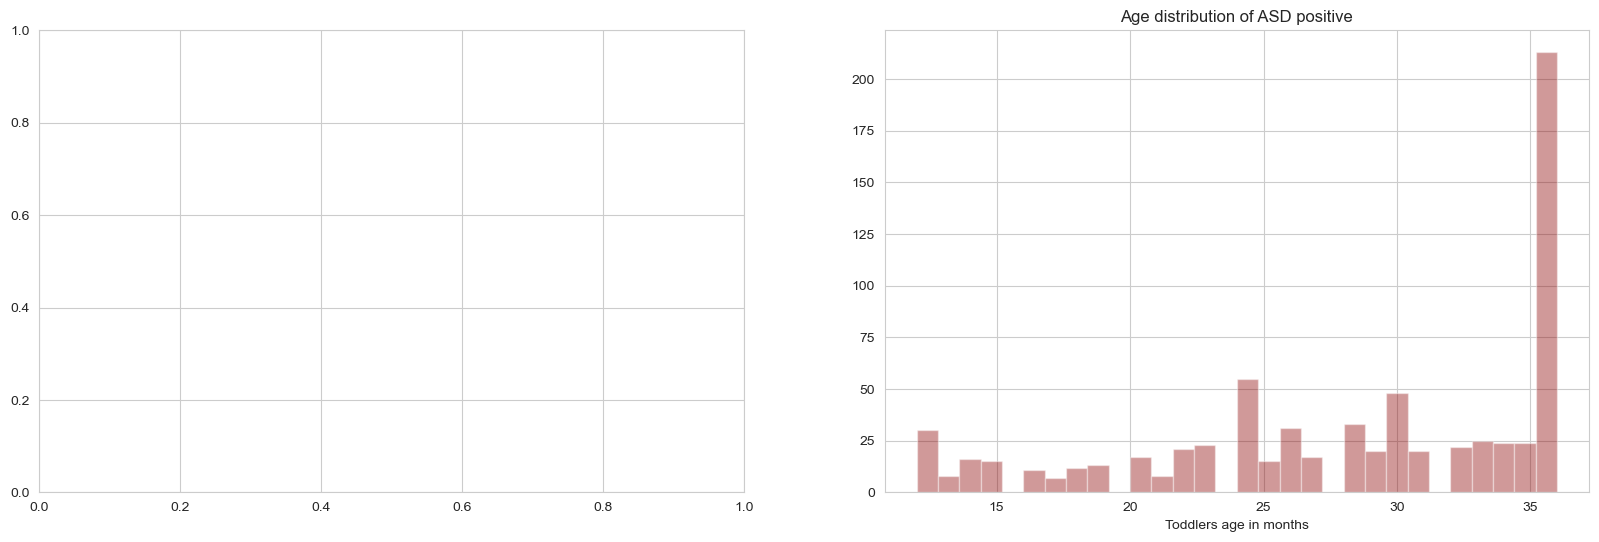

In [9]:
#Let's see the age distribution of ASD positive
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(data2['Age_Mons'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

In [10]:
#Lets see the ethnicity value counts
data2['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

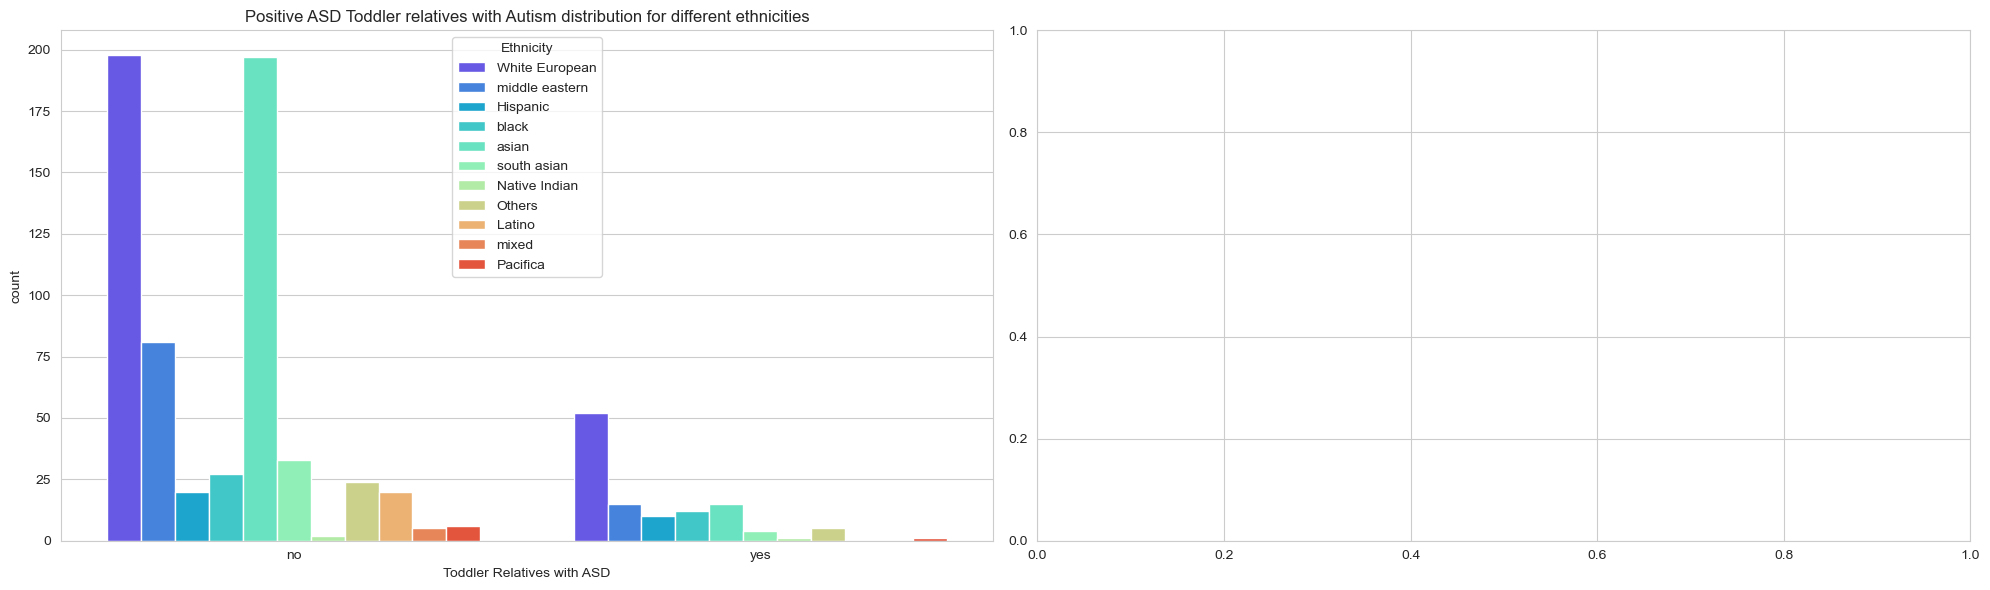

In [11]:
#Lets visualize the distribution of autism in family within different ethnicity
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='Family_mem_with_ASD',data=data2,hue='Ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax[0].set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()

In [12]:
pd.get_dummies(df2['Sex'],drop_first=True)

,m
0,0
1,1
2,1
3,1
4,0
...,...
1049,0
1050,1
1051,1
1052,1


In [13]:
pd.get_dummies(df2['Ethnicity'],drop_first=True)

,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,1,0,0,0,0,0
1050,0,0,0,0,0,0,1,0,0,0
1051,0,0,0,0,0,0,0,1,0,0
1052,0,0,0,0,1,0,0,0,0,0


In [14]:
within24_36= pd.get_dummies(df2['Age_Mons']>24,drop_first=True)
within0_12 = pd.get_dummies(df2['Age_Mons']<13,drop_first=True)
male=pd.get_dummies(df2['Sex'],drop_first=True)
ethnics=pd.get_dummies(df2['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df2['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df2['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df2['Class/ASD Traits '],drop_first=True)

In [15]:
df2.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [16]:
final_data= pd.concat([within0_12,within24_36,male,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)
final_data.columns=['within0_12','within24_36','male','Latino','Native Indian','Others','Pacifica','White European','asian','black','middle eastern','mixed','south asian','jaundice','ASD_genes','ASD_traits']
final_data.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes,ASD_traits
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [17]:
from sklearn.model_selection import train_test_split
X= final_data.iloc[:,:-1]
y= final_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes
0,-0.260543,0.714163,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
1,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,1.630865,-0.438529
2,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
3,-0.260543,-1.400241,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,-0.438529
4,-0.260543,-1.400241,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,2.280351


In [19]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=logmodel.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
#print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

[[ 11  67]
 [  4 129]]
              precision    recall  f1-score   support

           0       0.73      0.14      0.24        78
           1       0.66      0.97      0.78       133

    accuracy                           0.66       211
   macro avg       0.70      0.56      0.51       211
weighted avg       0.69      0.66      0.58       211



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [23]:
 pred_rfc= rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))
#print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

[[ 24  54]
 [  7 126]]
              precision    recall  f1-score   support

           0       0.77      0.31      0.44        78
           1       0.70      0.95      0.81       133

    accuracy                           0.71       211
   macro avg       0.74      0.63      0.62       211
weighted avg       0.73      0.71      0.67       211



In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn import metrics
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

Accuracy Score :  0.7014218009478673
[[ 32  46]
 [ 17 116]]


In [25]:
from sklearn.tree import export_graphviz

In [26]:
!pip install six

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from six import StringIO

In [28]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [38]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [37]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



InvocationException: GraphViz's executables not found

In [31]:
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=6)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7251184834123223


In [36]:
dot_data=StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))


Accuracy:  0.38388625592417064


In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes
0,-0.260543,0.714163,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
1,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,1.630865,-0.438529
2,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
3,-0.260543,-1.400241,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,-0.438529
4,-0.260543,-1.400241,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,2.280351


Defaulting to user installation because normal site-packages is not writeable


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

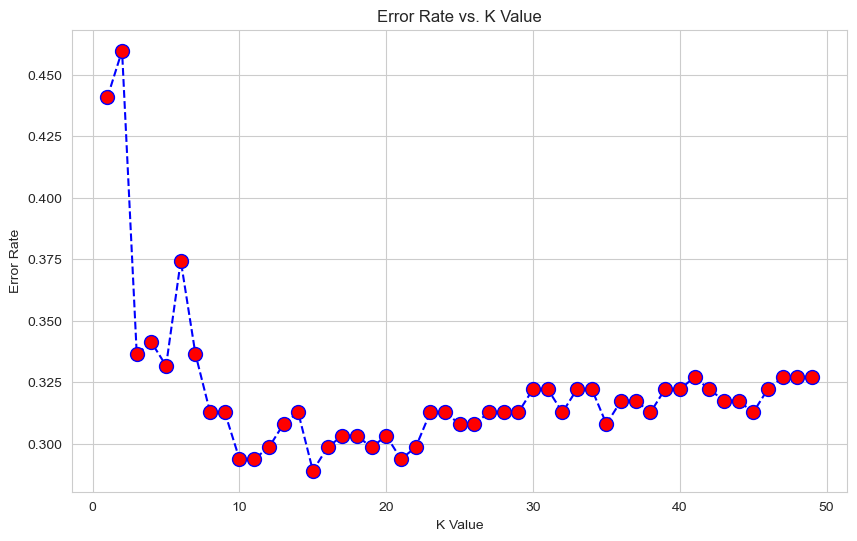

In [35]:
!pip install scikit-learn numpy matplotlib

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Replace X_scaled and y with your actual feature and target data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


In [75]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

[[ 25  53]
 [ 12 121]]
              precision    recall  f1-score   support

           0       0.68      0.32      0.43        78
           1       0.70      0.91      0.79       133

    accuracy                           0.69       211
   macro avg       0.69      0.62      0.61       211
weighted avg       0.69      0.69      0.66       211

Accuracy:  0.38388625592417064


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
df = pd.read_csv('Toddler Autism dataset July 2018.csv')

df.drop(['Case_No', 'Who completed the test'], axis=1, inplace=True)
df.head()
X = df.drop(['Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df)

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score Sex  \
0      0   0   0   0   0   0   1   1   0    1        28               3   f   
1      1   1   0   0   0   1   1   0   0    0        36               4   m   
2      1   0   0   0   0   0   1   1   0    1        36               4   m   
3      1   1   1   1   1   1   1   1   1    1        24              10   m   
4      1   1   0   1   1   1   1   1   1    1        20               9   f   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...             ...  ..   
1049   0   0   0   0   0   0   0   0   0    1        24               1   f   
1050   0   0   1   1   1   0   1   0   1    0        12               5   m   
1051   1   0   1   1   1   1   1   1   1    1        18               9   m   
1052   1   0   0   0   0   0   0   1   0    1        19               3   m   
1053   1   1   0   0   1   1   0   1   1    0        24               6   m   

           Ethnicity Jaundice Family_mem_with_ASD C

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Jaundice'] = le.fit_transform(df['Jaundice'])
df['Family_mem_with_ASD'] = le.fit_transform(df['Family_mem_with_ASD'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,No
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,Yes


In [78]:
X = df.drop(['Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df)

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  Sex  \
0      0   0   0   0   0   0   1   1   0    1        28               3    0   
1      1   1   0   0   0   1   1   0   0    0        36               4    1   
2      1   0   0   0   0   0   1   1   0    1        36               4    1   
3      1   1   1   1   1   1   1   1   1    1        24              10    1   
4      1   1   0   1   1   1   1   1   1    1        20               9    0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...             ...  ...   
1049   0   0   0   0   0   0   0   0   0    1        24               1    0   
1050   0   0   1   1   1   0   1   0   1    0        12               5    1   
1051   1   0   1   1   1   1   1   1   1    1        18               9    1   
1052   1   0   0   0   0   0   0   1   0    1        19               3    1   
1053   1   1   0   0   1   1   0   1   1    0        24               6    1   

      Ethnicity  Jaundice  Family_mem_w

In [79]:
clf = GaussianNB()

In [81]:
clf.fit(X_train, y_train)

GaussianNB()

In [82]:
y_pred = clf.predict(X_test)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,No
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,Yes


In [83]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9715639810426541
